In order to make sure that all cells of code run properly throughout this lesson, please run the following cell of code below:

In [1]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, Aer, execute 
from qiskit.visualization import plot_histogram, circuit_drawer
import random
import math as m 
import numpy as np
import scipy as sci

S_simulator = Aer.backends(name='statevector_simulator')[0]
M_simulator = Aer.backends(name='qasm_simulator')[0]

In [2]:
def From_Binary(S, LSB):
  '''
  Input: S (string or array) LSB (string)
  Converts a base-2 binary number to base-10 according to left or right least significant bit notation
  '''
  num = 0
  for i in np.arange(len(S)):
    if(LSB=='R'):
      num = num + int(S[int(0-(i+1))]) * 2**(i)
    if(LSB=='L'):
      num = num + int(S[int(i)]) * 2**(i)
  return num

In [3]:
def Binary(N,total,LSB):
  '''
  Input: N (integer) total (integer) LSB (string)
  Returns the base-2 binary equivilant of N according to left or right least significant bit notation
  '''
  qubits = int(m.log(total, 2))
  b_num = np.zeros(qubits)
  for i in np.arange(qubits):
    if( N/((2)**(qubits-i-1)) >= 1):
      if (LSB == 'R'):
        b_num[i] = 1
      if(LSB== 'L'):
        b_num[int(qubits-(i+1))] = 1
      N = N - 2**(qubits-i-1)
  B = []
  for j in np.arange(len(b_num)): 
    B.append(int(b_num[j]))
  return B

In [4]:
def Wavefunction( obj, *args, **kwargs):
  '''
  Displays the wavefunction of the quantum system
  '''
  if(type(obj) == QuantumCircuit ):
    statevec = execute( obj, S_simulator, shots=1 ).result().get_statevector() 
  if(type(obj) == np.ndarray):
    statevec = obj
  sys = False
  NL = False
  dec = 5
  if 'precision' in kwargs:
    dec = int(kwargs['precision'] )  
  if 'column' in kwargs:  
    NL = kwargs['column']
  if 'systems' in kwargs:
    systems=kwargs['systems']
    sys = True
    last_sys= int(len(systems)-1)
    show_systems = []
    for s_chk in np.arange(len(systems)): 
      if( type(systems [s_chk])!=int ):
        raise Exception('systems must be an array of all integers')
    if 'show_systems' in kwargs: 
      show_systems = kwargs['show_systems']
      if(len(systems)!=len (show_systems) ):
        raise Exception('systems and show_systems need to be arrays of equal length')
      for ls in np.arange(len(show_systems)): 
        if((show_systems [ ls]!=True) and (show_systems [ ls] !=False)): 
          raise Exception('show_systems must be an array of Truth Values') 
        if(show_systems [ ls] ==True): 
          last_sys= int(ls)

    else:
      for ss in np.arange(len(systems)): 
        show_systems.append(True)
  wavefunction = ''
  qubits = int(m.log(len(np.asarray(statevec)),2)) 
  for i in np.arange( int(len(np.asarray(statevec))) ): 
    value = round(statevec[int(i)].real, dec) + round(statevec[int(i)].imag, dec) * 1j
    if( (value.real!=0) or (value.imag!=0)): 
      state= list(Binary(int(i), int(2**qubits),'L'))
      state_str = ''
      if( sys == True ):    #Systems and Show Systems
        k = 0 
        for s in np.arange(len(systems)):
          if(show_systems [s]==True):
            if(int(s)!=last_sys):
              state.insert(int(k+systems [s]), '>|' ) 
              k = int(k+systems[s]+1)
            else:
              k = int(k+systems[s])
          else:
            for s2 in np.arange(systems [s]): 
              del state[int(k)]
      for j in np.arange(len(state)):
        if(type(state[j])!=str):
          state_str = state_str+str(int(state[j]))
        else:
          state_str = state_str+state[j]
      if ((value.real!=0) and (value.imag!=0)):
        if( value.imag> 0):
          wavefunction = wavefunction + str(value.real) + '+' + str(value.imag) + 'j |' + state_str + '>   '
        else:
          wavefunction = wavefunction + str(value.real) +'' + str(value.imag) + 'j |' + state_str + '>    '
      if( (value.real!=0) and (value.imag==0)): 
        wavefunction = wavefunction +str(value.real)+' |'+state_str +'>     '
      if((value.real==0) and (value.imag!=0)): 
        wavefunction = wavefunction +str(value.imag)+'j |'+state_str+ '>     '
      if (NL):
        wavefunction = wavefunction + '\n'
  print(wavefunction)


In [5]:
'''
Do not worry about the length of this code block.
You dont need to understand this code.
It is only to help you view the wavefunction after partial measuremnt in a better way
'''

def Measurement(quantumcircuit, **kwargs):
  '''
  Executes a measurement(s) of a QuantumCircuit object for tidier printing
  Keyword Arguments:
  shots (integer) - number of trials to execute for the measurement(s)
  return_M (Bool) - indictaes whether to return the Dictionary object containng measurement resul
  print_M (Bool) - indictaes whether to print the measurement results
  column (Bool) - prints each state in a vertical column
  '''
  p_M = True
  S=1
  ret = False
  NL = False
  if 'shots' in kwargs:
    S = int(kwargs['shots'])
  if 'return_M' in kwargs:
    ret = kwargs['return_M']
  if 'print_M' in kwargs:
    p_M = kwargs['print_M']
  if 'column' in kwargs:
    NL = kwargs['column']
  M1 = execute(quantumcircuit, M_simulator, shots=S).result().get_counts(quantumcircuit)
  M2 = {}
  k1 = list(M1.keys())
  v1 = list(M1.values())
  for k in np.arange(len(k1)):
    key_list = list(k1[k])
    new_key = ''
    for j in np.arange(len(key_list)):
      new_key = new_key+key_list[len(key_list)-(j+1)]
    M2[new_key] = v1[k]
  if(p_M):
    k2 = list(M2.keys())
    v2 = list(M2.values())
    measurements = ''
    for i in np.arange( len(k2) ):
      m_str = str(v2[i])+'|'
      for j in np.arange(len(k2[i])):
        if( k2[i][j] == '0' ):
          m_str = m_str+'0'
        if( k2[i][j] == '1' ):
          m_str = m_str+'1'
        if( k2[i][j] == ' ' ):
          m_str = m_str+'>|'
      m_str = m_str+'>   '
      if(NL):
        m_str = m_str + '\n'
      measurements = measurements + m_str
    print(measurements)
  if(ret):
    return M2

In [6]:
def DFT(x, **kwargs):
  '''
  Input: x (array)
  Keyword Arguments: inverse (Bool) - if True, performs a Inverse Discrete Fourier Transformation instead
  Computes a classical Discrete Fourier Transformation on the array of values x, returning a new array of transformed values
  '''
  p = -1.0
  if 'inverse' in kwargs:
    P = kwargs['inverse']
    if(P == True):
      p = 1.0
  L = len(x)
  X = []
  for i in np.arange(L):
    value = 0
    for j in np.arange(L):
      value = value + x[j]*np.exp(p*2*m.pi*1.0j * ( int(i*j)/(L*1.0) ) )
    X.append(value)
  for k in np.arange(len(X)):
    re = round(X[k].real,5)
    im = round(X[k].imag,5)
    if( (abs(im) == 0) and (abs(re) != 0) ):
      X[k] = re
    elif( (abs(re) == 0) and (abs(im) != 0) ):
      X[k] = im*1.0j
    elif( (abs(re) == 0) and (abs(im) == 0) ):
      X[k] = 0
    else:
      X[k] = re + im*1.0j
  return X

In [7]:
def QFT_dgr (qc, q, qubits):
  '''
  Assigns all the gate operations for an inverse Quantum Fourier Transformation
  '''
  R_phis = [0]

  for i in np.arange(2,int(qubits+1)):
    R_phis.append(-2/(2**(i))*m.pi )
  
  for j in np.arange(int(qubits)): 
    for k in np.arange( int(j) ):
      qc.cp(R_phis[int(qubits - (k+1))], q[int(qubits - (k+1))], q[int(qubits - (j+1))] )
    qc.h( q[int(qubits - (j+1))] )

In [8]:
def n_Control_U(qc, control, anc, gates):
  '''
  Input:
  qc (QuantumCircuit),control (QuantumRegister), anc (QuantumRegister),gates (array of the form [[string,QuantumRegister[i]],[],...])
  Performs the list of control gates on the respective target qubits as a higher order N-control operation
  '''
  if( len(gates)!=0 ):
    instructions = []
    active_ancilla = []
    q_unused = []
    n = len(control)
    q = 0
    a = 0
    while( (n > 0) or (len(q_unused)!=0) or (len(active_ancilla)!=0) ):
      if( n > 0 ):
        if( (n-2) >= 0 ):
          instructions.append( [control[q], control[q+1], anc[a]] )
          active_ancilla.append(a)
          a = a + 1
          q = q + 2
          n = n - 2
        if( (n-2) == -1 ):
          q_unused.append( q )
          n = n - 1
      
      elif( len(q_unused) != 0 ):
        if(len(active_ancilla)>1):
          instructions.append( [control[q], anc[active_ancilla[0]], anc[a]] )
          del active_ancilla[0]
          del q_unused[0]
          active_ancilla.append(a)
          a = a + 1
        else:
          instructions.append( [control[q], anc[active_ancilla[0]], anc[a]] )
          del active_ancilla[0]
          del q_unused[0]
          c_a = anc[a]
      
      elif( len(active_ancilla)!=0 ):
        if( len(active_ancilla) > 2 ):
          instructions.append( [anc[active_ancilla[0]], anc[active_ancilla[1]], anc[a]] )
          active_ancilla.append(a)
          del active_ancilla[0]
          del active_ancilla[0]
          a = a + 1
        elif( len(active_ancilla)==2):
          instructions.append([anc[active_ancilla[0]], anc[active_ancilla[1]], anc[a]] )
          del active_ancilla[0]
          del active_ancilla[0]
          c_a = anc[a]
        elif( len(active_ancilla)==1):
          c_a = anc[active_ancilla[0]]
          del active_ancilla[0]
    
    for i in np.arange( len(instructions) ):
      qc.ccx( instructions[i][0], instructions[i][1], instructions[i][2] )
    
    for j in np.arange(len(gates)):
      control_vec = [ gates[j][0], c_a ]
      for k in np.arange( 1, len(gates[j])):
        control_vec.append( gates[j][k] )
      if( control_vec[0] == 'X' ):
        qc.cx( control_vec[1], control_vec[2] )
      if( control_vec[0] == 'Z' ):
        qc.cz( control_vec[1], control_vec[2] )
      if( control_vec[0] == 'PHASE' ):
        qc.cp( control_vec[2], control_vec[1], control_vec[3] )
      if( control_vec[0] == 'SWAP' ):
        qc.cswap( control_vec[1], control_vec[2], control_vec[3] )
    for i in np.arange( len(instructions) ):
      qc.ccx( instructions[0-(i+1)][0], instructions[0-(i+1)][1], instructions[0-(i+1)][2] )

In [9]:
def X_Transformation (qc, qreg, state):
  '''
  Input:qc (QuantumCircuit), qreg (QuantumRegister), state (array)
  Applies the neccessary X gates to transform 'state' to the state of all 1's
  '''
  for j in np.arange(len(state)):
    if(int(state[j])==0): 
      qc.x( qreg[int(j)])

In [10]:
def GCD(a, b):
  '''
  Input: a (integer), b (integer)
  Computes the greatest common denominator between a and b using an inefficient exhasutive search
  '''
  gcd = 0
  if(a > b):
    num1 = a
    num2 = b
  elif(b > a):
    num1 = b
    num2 = a
  elif(a == b):
    gcd = a
  while( gcd == 0 ):
    i = 1
    while( num1 >= num2*i ):
      i = i + 1
    if( num1 == num2*(i-1) ):
      gcd = num2
    else:
      r = num1 - num2*(i-1)
      num1 = num2
      num2 = r
  return gcd

In [11]:
def Euclids_Alg(a, b):
  '''
  Input: a (integer), b (integer)
  Computes the greatest common denominator between a and b using Euclid's Algorithm
  '''
  if(a>b):
    num1 = a
    num2 = b
  if(b>a):
    num1 = b
    num2 = a
  if(b==a):
    gcd = a
    r_old = 0
  r_new = int( num1%num2 )
  r_old = int( num2 )
  while(r_new!=0):
    r_old = r_new
    r_new = int( num1%num2 )
    num1 = num2
    num2 = r_new
  gcd = r_old
  return gcd

In [12]:
def r_Finder(a, N):
  '''
  Input: a (integer), N (integer)
  Exhaustively computes the period r to the modulo power function a^x (mod N)
  '''
  value1 = a**1 % N
  r = 1
  value2 = 0
  while( (value1 != value2) or (r >1000) ):
    value2 = a**(int(1+r)) % N
    if( value1 != value2 ):
      r = r + 1
  return r

# **Quantum Period Finding**
***

Now that we have seen how we can use modulo period finding to our advantage, we have arrived at the point in Shor's Algorithm where a quantum computer
will provide us our speedup. But to properly motivate why we need a quantum computer, we must first ask how a classical computer would approach the
period finding problem. As it turns out, when N starts to get sufficiently large, the task of finding r becomes increasingly more difficult, so much so in fact that
we arrive at nearly the exact same bottleneck as before.

Previously we commented that a classical computer is stuck blindly searching for either the factors of N or values for $a^2$, well the same turns out to be true for r. From the perspective of a classical algorithm, the only way to compute the period of these modulo power functions is to start with $a^0$, and continually
increase the power until we once again get an output of 1 (mod N). However, for large N , the number of powers one must check before getting the correct
output can be as high as the order O(N) , i.e. the same number of possible values we would normally check in the most basic exhaustive search. In fact,
searching for r could be worse than simply searching for $f_1$
and $f_2$, since at least an odd valued N
means that the factors must be smaller than $\frac{N}{2}$. And so, we have finally reached the end of the rope in terms of classical attempts at factoring, and now we turn to quantum.

## **Quantum Modulo Operation**
***

The first step to our quantum period finding subroutine is to initialize our quantum system by allocating our qubits into two seperate systems of equal length.
To determine how many qubits are necessary for our circuit, we must first transform the number we are trying to factor into binary. Each of our systems must
have enough qubits, which we will call Q , such that they can completely represent N as a binary number. For example, if we would like to factor the number 15
, then we would initialize our system as follows:

$$
|0000⟩ ⊗ |0000⟩
$$

Written out in binary, the number 15 is 1111 , which requires four qubits. Next, after allocating the necessary qubits, we create an equal superposition state
on one of the two systems using Hadamard gates:

$$
H^Q |0000⟩ ⊗ |0000⟩
$$

Resulting from
𝑄 Hadamard gates on the first set of qubits, we can think of this superposition state as a complete representation of all the binary numbers
from 0 to $2^𝑄$ -1:

$$
\frac{1}{2^{\frac{Q}{2}}} (|0000⟩+|1000⟩+|0100⟩+|1100⟩.....+|1111⟩ )⊗ |0000⟩
$$

Now, the next operation we will look to perform is a bit tricky. In essence, our goal is to encode the modulo power function $a^n$ (mod N) into our quantum
system. Specifically, this operation will take n as the binary number from the first quantum system, and output the corresponding modulo power result onto
the second quantum system. And since we have set up our first system in the superposition state, the resulting final state of the second system from this
quantum modulo operation will contain all of the modulo power results from 0 to $2^Q$ - 1. Visually, the final state of the combined quantum system will look like
as follows, using
a = 8 and N = 15
as our example:

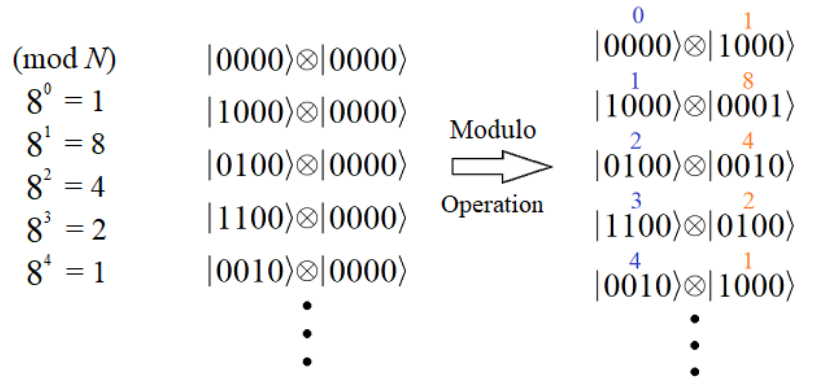

The implementation of the operation shown above is not a trivial one, and is still an active field of research. Mathematically however, hopefully it is clear that
our goal is to use each state in the first system as an input, transforming the state of the second system to encode the modulo power function. Below is an
example of the kind of final states we will aim to create:

In [13]:
S1 = [round(random.random()),round(random.random()),round(random.random()),round(random.random())]
a = 8
N = 15
print('N: ',N,'a: ',a)
#====================================
q1 = QuantumRegister(4,name='q1')
q2 = QuantumRegister(4,name='q2')
qc = QuantumCircuit(q1,q2,name='qc')
#------------------------------------
for i in np.arange(4):
  if(S1[i]==1):
    qc.x( q1[int(i)] )
print('\n_____ Initial State _____')
Wavefunction(qc,systems=[4,4])
#------------------------------------
S1_num = S1[0] + 2*S1[1] + 4*S1[2] + 8*S1[3]
S2_num = a**(S1_num) % N
print('\nState 1: ',S1_num,'Desired State 2: ',a,'^',S1_num,' ( mod ',N,') = ',S2_num)
#------------------------------------
for j in np.arange(4):
  if( S2_num >= 2**(3-j) ):
    qc.x( q2[int(3-j)] )
    S2_num = S2_num - 2**(3-j)
print('\n_____ After Modulo Operation_____')
Wavefunction(qc,systems=[4,4])

N:  15 a:  8

_____ Initial State _____
1.0 |0111>|0000>     

State 1:  14 Desired State 2:  8 ^ 14  ( mod  15 ) =  4

_____ After Modulo Operation_____
1.0 |0111>|0010>     


The cell of code above creates a random state using four qubits, calculates what the modulo power function result should be, and then uses
gates to
create the desired state on the second system. For our purpose of learning Shor's Algorithm, handling the modulo operation in this way is sufficient. However,
in order to obtain a real speedup, we would need a way of performing this task without the use of any classical computations. Such implementations do exist,
but are unfortunately beyond the scope of this lab series here. That being said, it's not that we don't have the tools to understand such quantum circuits,
which essentially combine Quantum Modulo Adders with Quantum Phase Estimation, it's simply the fact that to
properly discuss such circuits would take too long, basically warranting an entire lesson in itself. Moreover, our primary focus is to understand the theory
behind Shor's Algorithm, which is the same regardless of how efficient / inefficient our circuit is at achieving the desirable quantum state.

If you're still curious about these more advanced quantum circuits for achieving the quantum modulo operation, I encourage you to check out some additional
resources given in references(2). For our learning purposes here, we will be handling these modulo operations through the use of CNOT gates, analogous to the way in which
we flip phases in Grover's Algorithm. Below is an example which demonstrates how we can create the desired states in our second quantum system, when
our input system is in a superposition state: 

In [14]:
a = 8
N = 15
q1_state = [1,0,1,0]
q2_state = Binary( a**(int( From_Binary(q1_state,'L') ))%N, 2**4 ,'L' )
print('a = ',a,'N = ',N)
print('\nInput State: ',q1_state,'Desired Modulo State: ',q2_state)
#=====================================
q1 = QuantumRegister(4,name='q1')
q2 = QuantumRegister(4,name='q2')
an = QuantumRegister(3,name='a')
qc = QuantumCircuit(q1,q2,an,name='qc')
#--------------------------------------
qc.h(q1[0])
qc.h(q1[2])
qc.cx( q1[0], q1[1] )
qc.cx( q1[2], q1[1])
print('\n_____ Initial State _____')
Wavefunction(qc,systems=[4,4,3],show_systems=[True,True,False])
qc.barrier()
#-------------------------------------- |1010> state
X_Transformation(qc,q1,q1_state)
qc.ccx( q1[0], q1[1], an[0] )
qc.ccx( q1[2], an[0], an[1] )
qc.ccx( q1[3], an[1], an[2] )
for i in np.arange(len(q2_state)):
  if( q2_state[i]==1 ):
    qc.cx( an[2], q2[int(i)] )
qc.ccx( q1[3], an[1], an[2] )
qc.ccx( q1[2], an[0], an[1] )
qc.ccx( q1[0], q1[1], an[0] )
X_Transformation(qc,q1,q1_state)
print('\n_____ After Modulo Operation _____')
Wavefunction(qc,systems=[4,4,3],show_systems=[True,True,False])
circuit_drawer(qc)

a =  8 N =  15

Input State:  [1, 0, 1, 0] Desired Modulo State:  [0, 0, 0, 1]

_____ Initial State _____
0.5 |0000>|0000>     0.5 |1100>|0000>     0.5 |1010>|0000>     0.5 |0110>|0000>     

_____ After Modulo Operation _____
0.5 |0000>|0000>     0.5 |1100>|0000>     0.5 |0110>|0000>     0.5 |1010>|0001>     


┌───┐           ░                                                   
q1_0: ┤ H ├──■────────░────────■──────────────────────────────────■───────
      └───┘┌─┴─┐┌───┐ ░ ┌───┐  │                                  │  ┌───┐
q1_1: ─────┤ X ├┤ X ├─░─┤ X ├──■──────────────────────────────────■──┤ X ├
      ┌───┐└───┘└─┬─┘ ░ └───┘  │                                  │  └───┘
q1_2: ┤ H ├───────■───░────────┼────■───────────────────■─────────┼───────
      └───┘           ░ ┌───┐  │    │                   │  ┌───┐  │       
q1_3: ────────────────░─┤ X ├──┼────┼────■─────────■────┼──┤ X ├──┼───────
                      ░ └───┘  │    │    │         │    │  └───┘  │       
q2_0: ────────────────░────────┼────┼────┼─────────┼────┼─────────┼───────
                      ░        │    │    │         │    │         │       
q2_1: ────────────────░────────┼────┼────┼─────────┼────┼─────────┼───────
                      ░        │    │    │         │    │         │       
q2_2: ────────────────░────────┼────┼────┼─────────┼────┼─────────┼───────
                      ░        │    │    │  ┌───┐  │    │         │       
q2_3: ────────────────░────────┼────┼────┼──┤ X ├──┼────┼─────────┼───────
                      ░      ┌─┴─┐  │    │  └─┬─┘  │    │       ┌─┴─┐     
 a_0: ────────────────░──────┤ X ├──■────┼────┼────┼────■───────┤ X ├─────
                      ░      └───┘┌─┴─┐  │    │    │  ┌─┴─┐     └───┘     
 a_1: ────────────────░───────────┤ X ├──■────┼────■──┤ X ├───────────────
                      ░           └───┘┌─┴─┐  │  ┌─┴─┐└───┘               
 a_2: ────────────────░────────────────┤ X ├──■──┤ X ├────────────────────
                      ░                └───┘     └───┘

As shown above, the general approach to how we will be applying the quantum modulo operation is through the use of X transformations and higher order
CCX operations , the very same technique used in Grover's in one of our previous lab sessions. The example above demonstrates how we will be able to create the desired modulo power result for each of the individual $2^Q$ basis states, despite being in a superposition. As shown in the results of the code, the circuit above creates
the binary state representation of $8^5$ (mod 15) in system two, but only for the state |1010⟩ . In the coming examples, these steps will be handled by the following Mod_Op function, which will automatically assign all of the necessary gates for a complete modulo operation.

In [15]:
def Modulo_f(Q, a, N):
  '''
  Input: Q (integer), a (integer), N (integer)
  Produces an array of all the final modulo N results for the power function a^x (mod N)
  '''
  mods = [1]
  for i in np.arange(1,2**Q):
    if(i==1):
      mods.append(a**i%N)
      num = a**i%N
    if(i>1):
      mods.append((num*a)%N)
      num = (num*a)%N
  return mods

In [16]:
def Mod_Op(Q, qc, q1, q2, anc, a, N):
  '''
  Input:Q (integer), qc (QuantumCircuit), q1 (QuantumRegister), anc (QuantumRegister), a (integer), N (integer)
  Applies the Modulo Multiplication operator for Shor's algorithm
  '''
  mods = Modulo_f(Q,a,N)
  for j in np.arange( 2**Q ):
    q1_state = Binary( j, 2**Q, 'L' )
    q2_state = Binary( mods[j], 2**Q ,'L' )
    gates = []
    for k in np.arange(Q):
      if(q2_state[k]==1):
        gates.append(['X',q2[int(k)]])
    X_Transformation(qc,q1,q1_state)
    n_Control_U(qc, q1, anc, gates)
    X_Transformation(qc,q1,q1_state)

In [17]:
a = 8
N = 15
Q = 4
print('a: ',a,'N: ',N)
#=====================================
q1 = QuantumRegister(Q,name='q1')
q2 = QuantumRegister(Q,name='q2')
an = QuantumRegister(Q-1,name='a')
qc = QuantumCircuit(q1,q2,an,name='qc')
#--------------------------------------
for i in np.arange(Q):
  qc.h(q1[int(i)])
print('\n_____ Initial State _____')
Wavefunction(qc,systems=[4,4,3],show_systems=[True,True,False])

Mod_Op(Q,qc,q1,q2,an,a,N)

print('\n_____ After Modulo Operation _____')
Wavefunction(qc,systems=[4,4,3],show_systems=[True,True,False])

a:  8 N:  15

_____ Initial State _____
0.25 |0000>|0000>     0.25 |1000>|0000>     0.25 |0100>|0000>     0.25 |1100>|0000>     0.25 |0010>|0000>     0.25 |1010>|0000>     0.25 |0110>|0000>     0.25 |1110>|0000>     0.25 |0001>|0000>     0.25 |1001>|0000>     0.25 |0101>|0000>     0.25 |1101>|0000>     0.25 |0011>|0000>     0.25 |1011>|0000>     0.25 |0111>|0000>     0.25 |1111>|0000>     

_____ After Modulo Operation _____
0.25 |0000>|1000>     0.25 |0010>|1000>     0.25 |0001>|1000>     0.25 |0011>|1000>     0.25 |1100>|0100>     0.25 |1110>|0100>     0.25 |1101>|0100>     0.25 |1111>|0100>     0.25 |0100>|0010>     0.25 |0110>|0010>     0.25 |0101>|0010>     0.25 |0111>|0010>     0.25 |1000>|0001>     0.25 |1010>|0001>     0.25 |1001>|0001>     0.25 |1011>|0001>     


The cell of code above is our complete quantum modulo operation, whereby we have successfully encoded the modulo power function of a and N into all $2^Q$ superposition states. I encourage you to work through some of the final states for yourself, verifying that the Mod_Op function has indeed correctly created
all of the appropriate $a^n$ (mod N) binary states.

## **Partial Measurement**
***

After successfully implementing the quantum modulo operation like shown above, the next step in our subroutine will be something new to these lab sessions,
namely a measurement. But unlike a typical measurement, here we will be performing a 'partial measurement', whereby the measurement only occurs on half
of the qubits, specifically system two in this case (the qubits which received the effect of the modulo operation). By only measuring some of the qubits, but not
all, we will in effect collapse our system only partially. That is to say, the act of the measurement will collapse the qubits in the second system into either the |0⟩ or |1⟩ state, but will still leave behind some superposition amongst the qubits in the first system. Let's see this step in action:

In [18]:
a = 8
N = 15
Q = 4
print('a: ',a,'N: ',N)
#=====================================
q1 = QuantumRegister(Q,name='q1')
q2 = QuantumRegister(Q,name='q2')
an = QuantumRegister(Q-1,name='a')
c = ClassicalRegister(Q,name='c')
qc = QuantumCircuit(q1,q2,an,c,name='qc')
#--------------------------------------
for i in np.arange(Q):
  qc.h(q1[int(i)])
print('\n_____ Initial State _____')
Wavefunction(qc,systems=[Q,Q,Q-1],show_systems=[True,True,False])

Mod_Op(Q,qc,q1,q2,an,a,N)
print('\n_____ After Modulo Operation _____')
Wavefunction(qc,systems=[Q,Q,Q-1],show_systems=[True,True,False])

qc.measure(q2,c)
print('\n_____ After Partial Measurement _____')
Wavefunction(qc,systems=[Q,Q,Q-1],show_systems=[True,True,False])

a:  8 N:  15

_____ Initial State _____
0.25 |0000>|0000>     0.25 |1000>|0000>     0.25 |0100>|0000>     0.25 |1100>|0000>     0.25 |0010>|0000>     0.25 |1010>|0000>     0.25 |0110>|0000>     0.25 |1110>|0000>     0.25 |0001>|0000>     0.25 |1001>|0000>     0.25 |0101>|0000>     0.25 |1101>|0000>     0.25 |0011>|0000>     0.25 |1011>|0000>     0.25 |0111>|0000>     0.25 |1111>|0000>     

_____ After Modulo Operation _____
0.25 |0000>|1000>     0.25 |0010>|1000>     0.25 |0001>|1000>     0.25 |0011>|1000>     0.25 |1100>|0100>     0.25 |1110>|0100>     0.25 |1101>|0100>     0.25 |1111>|0100>     0.25 |0100>|0010>     0.25 |0110>|0010>     0.25 |0101>|0010>     0.25 |0111>|0010>     0.25 |1000>|0001>     0.25 |1010>|0001>     0.25 |1001>|0001>     0.25 |1011>|0001>     

_____ After Partial Measurement _____
0.5 |1100>|0100>     0.5 |1110>|0100>     0.5 |1101>|0100>     0.5 |1111>|0100>     


Running the cell of code above a few times, you should see the various possible outcomes for the second system. As promised, the partial measurement
causes all of the qubits in the second system to collapse down to single values, but does not completely erase the superposition from the first system. More
specifically, when one of the possible states in system two is measured, all of the corresponding states in system one which were attached to this state
remain in the leftover superposition, but now with new amplitudes. Conceptually, this leftover superposition represents the remaining uncertainty in system
one.

As an example, suppose states |A⟩, |B⟩, and |C⟩ are all tensored to the same state |Z⟩ in the initial grand superposition. If initially there are 100 otal
states, then the probability of system one being in any of these three states is 1\% each. However, if a partial measurement were to collapse system two into the |Z⟩ state, we must ask how this affects our uncertainty in system one. Since, |A⟩, |B⟩, and |C⟩ are the only possible candidates remaining for system
one, probabilistically we know that a follow up measurement should pick out one of these states, each with 33.3% chance. Thus, the wavefunction
corresponding to the state of our system after the partial measurement should reflect these probabilities, leaving |A⟩, |B⟩, and |C⟩ all with amplitudes of $\frac{1}{\sqrt{3}}$.

The important thing to note in this made up example is the way in which the wavefunction of system one changes as a result of a measurement on system two. Initially the states |A⟩, |B⟩, and |C⟩ all possess amplitudes of $\frac{1}{\sqrt{100}}$ , but after the partial measurement their amplitudes jump to $\frac{1}{\sqrt{3}}$, and
correspondingly all other amplitudes go to 0. Similarly, take a look at the example code above, and note that the amplitudes for the leftover superposition states jum from $\frac{1}{4}$ initially to $\frac{1}{2}$ after the measurement. This change in system one happens instantaneously once the measurement on system two occurs, and is yet another example of the weird nature of quantum mechanics (partial measurements and instantaneous wavefunction changing are essentially what Einstein could never reconcile with, calling it "spooky action at a distance"). For the purpose of Shor's Algorithm, this updating of the wavefunction after a
partial measurement is exactly the ingredient needed for the next step.

Now, in order to properly understand the next and final operation in our algorithm, we need to notice something very particular happening with the quantum
states after the partial measurement. As we shall see, the success of Shor's Algorithm isn't aided or hindered by any single partial measurement result on the
second system. Take a moment and look carefully at all of the possible states in the first system that share the same tensored secondary state. What you
should notice is a pattern something like this:

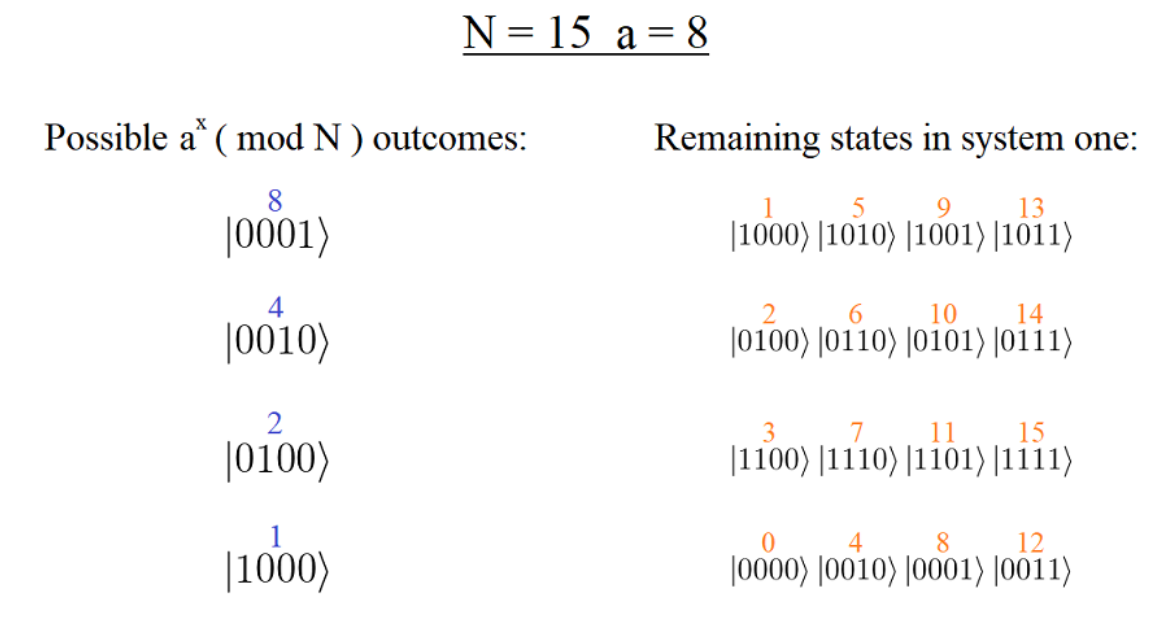

The important takeaway from the image above is the even spacing found in the states leftover from the partial measurement. No matter which state we find in
our second system, the remaining states in system one will always be evenly spaced by our period r. Thus, resulting from the combination of the modulo
operation along with a partial measurement, the period r is systematically encoded into the final remaining superposition state. 

Based on the result presented above, it may look like we've finally solved our problem of finding the period, but it is important to remember that these states
are in a superposition. As such, a measurement on system one will only reveal a single state, which alone tells us nothing about r. Repeating the process
numerous times will eventually reveal r, once a sufficient number of independent states have been found, but as we shall see, there is a better way.

# **$QFT^†$ on a Periodic Function**
***

The role of the partial measurement in Shor's Algorithm is to set up a state on system one like shown above, where we have an equal superposition of evenly
spaced states. Even though this superposition state has the period r undamentally woven into it, extracting r out requires further work. The manner in which
we are going to go about obtaining the period is quite clever, but will take some extra effort to fully digest. In particular, we must first revisit a property of the
Inverse Discrete Fourier Transformation ($DFT^†$ ), which in turn is the quantum mechanical equivalent to the $QFT^†$ operation we will be using to extract r. The
specific mathematical property we are interested in is the effect of a $DFT^†$ on a discrete periodic function. Take a look at the structure of the example function
below, which will serve as the template for an ideal quantum state:

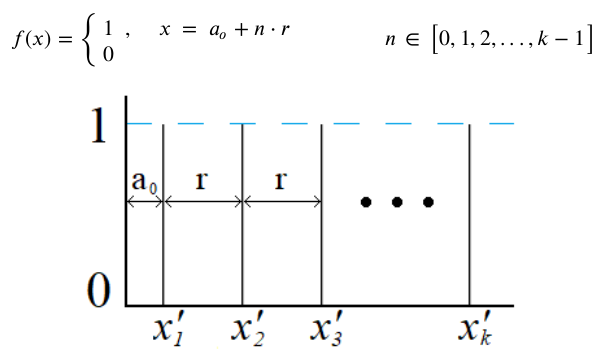

In the illustration shown above, the function 𝑓(𝑥) takes on the value 1 only for select inputs $𝑥′_𝑖$ . More specifically, these 𝑥′ values are all evenly spaced by a distance r, offset by some initial value $𝑎_0$ . If we return to the 𝑁 = 15 , 𝑎 = 8 figure from the previous section, notice that this pattern is in perfect agreement with the quantum states produced from the partial measurement. Based on which of the four states is found by the partial measurement on system two, the
remaining superposition state in system one contains all evenly spaced basis states, offset from |0000⟩ by some value. The only difference between our
quantum state and the 𝑓(𝑥) shown above is the fact that the amplitudes cannot equal 1, but instead have normalized values. This slight difference however 
has no impact on the coming effect, only influencing the scale of the final numbers (keeping the resulting quantum state normalized after the $QFT^†$ ). Thus, in
studying the effect of a $DFT^†$ on the function shown above, we can anticipate how the $QFT^†$ will transform our leftover superposition states.

To begin our analysis, we must first note something missing from the f(x) description above, namely its domain. The function provides the location of each x', spanning a total of k values, but doesn't say anything about how far beyond the final $x'_k$ the function continues (or if f(x)
extends to negative numbers
for that matter). For the trick we are about to observe to work properly, a crucial ingredient is that our discrete function only exists over a finite domain:

$$
𝑥 ∈ [ 0,𝐿 ]
$$

$$
𝐿 ≡ 𝑘⋅𝑟
$$

One way to think about the requirement shown above is that we can break up our function 𝑓(𝑥) into 'cycles', where the length of each cycle is equal to 𝑟 , and within each cycle there is exactly one 𝑥′ value. For example, if we have an 𝑓(𝑥) with a period of 𝑟 = 5 , 𝑘 = 3, there are several ways in which we can
define one cycle based on the value of $𝑎_0$ :

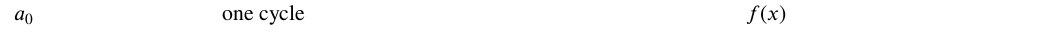

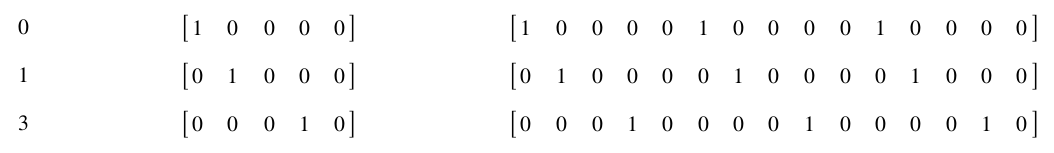

As shown above, the value of $𝑎_0$ defines where the location of 1 is offset in each cycle, leading to distinct constructions of 𝑓(𝑥) . In terms of our quantum
period finding, $𝑎_0$ is a problematic feature of our superposition state which makes determining 𝑟 through repeat sampling difficult. However, as we shall now see, regardless of the value of $𝑎_0$ , the effect of a $DFT^†$ on any of the 𝑓(𝑥)'s shown above will result in the same final function, $f̃(x)$ . But before getting into any of the math details, let's first observe this effect with some classical code:

In [19]:
k = 3
r = 5
a0 = int( (r)*random.random() )
L = k*r
C = np.zeros(r)
C[a0] = 1
print('k = ',k,'r = ',r,'a0 = ',a0,'\n\nOne Cycle:  ',C,'    L = ',L)
#------------------------------------------
f = []
for i in np.arange(k):
  for i2 in np.arange(r):
    f.append( int( C[i2] ) )
print('\nPeriodic Function: ',f)

F = DFT(f,inverse=True)
print('\nAfter DFT\u2020: ',F)
#------------------------------------------
F2 = []
for j in np.arange( len(F) ):
  F2.append( round(abs(F[j]),3) )
print('\n    |F|: ',F2 )

k =  3 r =  5 a0 =  2 

One Cycle:   [0. 0. 1. 0. 0.]     L =  15

Periodic Function:  [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]

After DFT†:  [3.0, 0, 0, (-2.42705+1.76336j), 0, 0, (0.92705-2.85317j), 0, 0, (0.92705+2.85317j), 0, 0, (-2.42705-1.76336j), 0, 0]

    |F|:  [3.0, 0, 0, 3.0, 0, 0, 3.0, 0, 0, 3.0, 0, 0, 3.0, 0, 0]


The cell of code above uses the function DFT to demonstrate the effect of $DFT^†$ on the discrete periodic function f(x). I encourage you to run the cell several times, taking note of how the initial offset value $a_0$ affects the final f̃(x). Although the final values may differ slightly, every construction of f(𝑥) leads to the same structure of f̃(x), whereby all of the non-zero values are in the same locations, and always have a magnitude of 3.0. Additionally, you should try changing the values of 𝑘 and 𝑟, and see if you can spot the underlying pattern going on here. Regardless of what values $a_0$ ,
𝑘, and 𝑟 take on, the cell of code above will produce a periodic function that fits our template f(𝑥), which in turn guarantees that the $DFT^†$ operation will produce the desired final result.

Mathematically for starters, let's
quickly remind ourselves of the summation which determines the resulting values from a $DFT^†$ (and similarly a $QFT^†$ ):

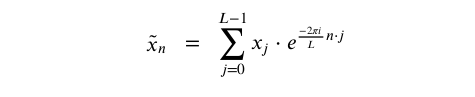



If now consider how the structure of f(x)
will affect this equation, all of the contributing $x_j$
terms in each of the summations shown above will be 0 except for
the x'
values, which are all equal to 1. Using k = 3
as an example, every $x̃_n$
term can be computed with the following expression:



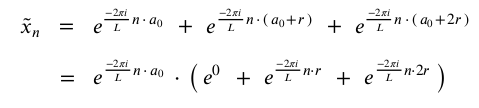

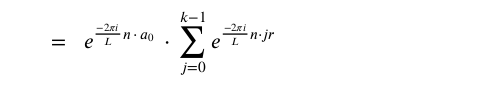

The significance of the expression shown above is the way in which the summation produces zero or non-zero $x̃_n$ terms. Beginning with $x̃_0$, we can see that
the summation will reduce to k terms of $e^0$ all added together, resulting in a total sum of k. Thus, the effect of $DFT^†$ applied to f(x) will always result in a $f̃(x)$ function beginning with the integer 𝑘, which will later be an important point. Moving on to $x̃_1$ then, the summation of exponentials will no longer all equal $e^0$, which means that we should expect contributions from complex numbers with various real and imaginary components, all with a magnitude of one. But
now here's where things get interesting: because we have a finite discrete function with 𝐿 = 𝑘 ⋅ 𝑟, the result of the summation above only ever has two
outputs:

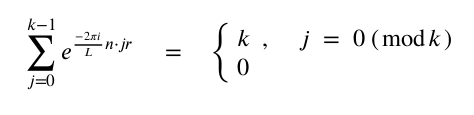

which we can confirm explicitly with the cell of code below:

In [20]:
k = int( 2+4*random.random() )
r = int( 2+4*random.random() )
L = k*r
print('k: ',k,'r: ',r,'L: ',L,'\n------------------------------\n')
#================================================
for q in np.arange(L):
  n = int(q)
  Q = 0
  for j in np.arange(k):
    Q = Q + np.exp( ((-2*m.pi*1.0j)/L) * n * j * r )
  print( 'n: ',n,'\u03A3 = ',round( Q.real,5 ),' + i',round(Q.imag,5) )

k:  2 r:  3 L:  6 
------------------------------

n:  0 Σ =  2.0  + i 0.0
n:  1 Σ =  0.0  + i -0.0
n:  2 Σ =  2.0  + i 0.0
n:  3 Σ =  0.0  + i -0.0
n:  4 Σ =  2.0  + i 0.0
n:  5 Σ =  0.0  + i -0.0


The fact that the summation shown above always equals 0 or k is the driving force behind why we're interested in using a $QFT^†$ on our quantum system. If
you've never seen a Fourier Transformation on a periodic function before, the result can be quite surprising at first. In order to better appreciate why so many
terms in the summation go to zero, the trick lies in the way in which the contributing complex numbers are equally spaced apart. Visually, these complex
numbers can be represented as evenly spaced points along a circle of radius 1 in the complex plane:

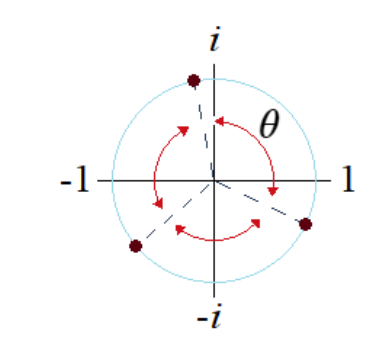

To summarize, the effect of a $DFT^†$ on a periodic discrete function f(x), which is mathematically equivalent to our
quantum system up to normalization factors, can be seen below in the following figures: 

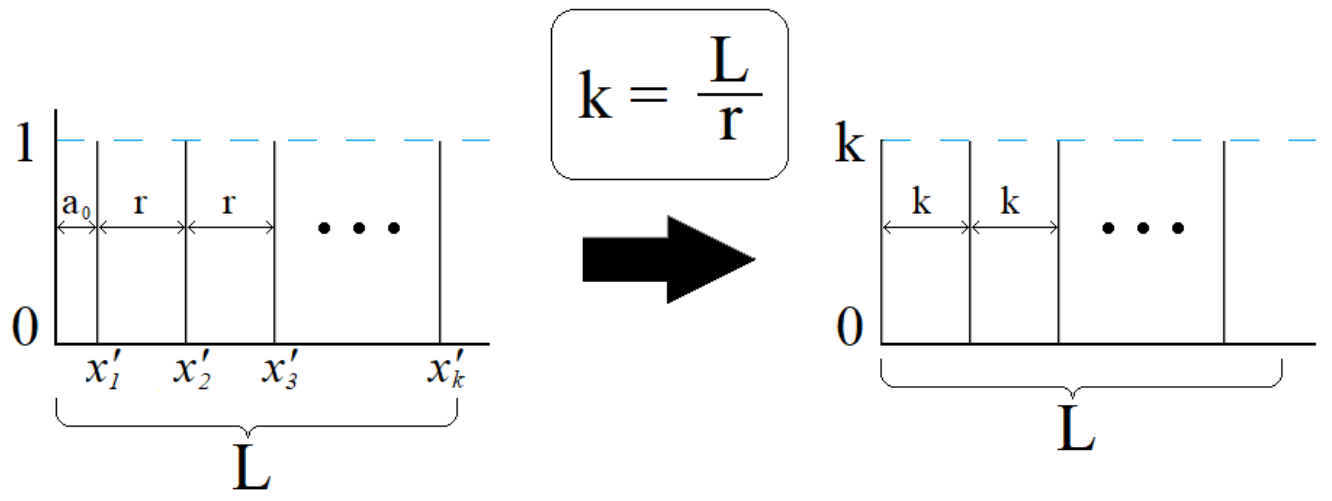

So long as the initial periodic function f(x) matches the criteria illustrated above, the effect of the $DFT^†$ will always transform the function according to the
right plot. In terms of our quantum algorithm, so long as our partial measurement results in a superposition state on system one of the correct form, the
resulting $QFT^†$ will give us a predictable final state. And now that we know what to expect, let's return to our N = 15 and a = 8 example from earlier, adding in
the final $QFT^†$ . Based on our analysis thus far, since our quantum system has an underlying period of r = 4, with a total size of L = 16, we should find a
final superposition state of four evenly spaced states, separated by a distance k = 4.

In [21]:
a = 8
N = 15
Q = 4
print('a: ',a,'N: ',N)
#=====================================
q1 = QuantumRegister(Q,name='q1')
q2 = QuantumRegister(Q,name='q2')
an = QuantumRegister(Q-1,name='a')
c = ClassicalRegister(Q,name='c')
qc = QuantumCircuit(q1,q2,an,c,name='qc')
#--------------------------------------
for i in np.arange(Q):
  qc.h(q1[int(i)])
print('\n_____ Initial State _____')
Wavefunction(qc,systems=[Q,Q,Q-1],show_systems=[True,True,False])

Mod_Op(Q,qc,q1,q2,an,a,N)
print('\n_____ After Modulo Operation _____')
Wavefunction(qc,systems=[Q,Q,Q-1],show_systems=[True,True,False])

qc.measure(q2,c)
QFT_dgr(qc,q1,Q)
print('\n_____ Partial Measurement + QFT\u2020_____')
Wavefunction(qc,systems=[Q,Q,Q-1],show_systems=[True,True,False])

a:  8 N:  15

_____ Initial State _____
0.25 |0000>|0000>     0.25 |1000>|0000>     0.25 |0100>|0000>     0.25 |1100>|0000>     0.25 |0010>|0000>     0.25 |1010>|0000>     0.25 |0110>|0000>     0.25 |1110>|0000>     0.25 |0001>|0000>     0.25 |1001>|0000>     0.25 |0101>|0000>     0.25 |1101>|0000>     0.25 |0011>|0000>     0.25 |1011>|0000>     0.25 |0111>|0000>     0.25 |1111>|0000>     

_____ After Modulo Operation _____
0.25 |0000>|1000>     0.25 |0010>|1000>     0.25 |0001>|1000>     0.25 |0011>|1000>     0.25 |1100>|0100>     0.25 |1110>|0100>     0.25 |1101>|0100>     0.25 |1111>|0100>     0.25 |0100>|0010>     0.25 |0110>|0010>     0.25 |0101>|0010>     0.25 |0111>|0010>     0.25 |1000>|0001>     0.25 |1010>|0001>     0.25 |1001>|0001>     0.25 |1011>|0001>     

_____ Partial Measurement + QFT†_____
0.5 |0000>|0001>     -0.5 |1000>|0001>     -0.5j |0100>|0001>     0.5j |1100>|0001>     


Take a look at the final superposition state produced on system one above, and note how the same four basis states show up every time, regardless of which
state is found in the partial measurement. More specifically, rerunning the cell of code above to see the different partial measurement results reveals that the
only difference is the phases on the four final basis states, which we can attribute to the displacement $a_0$ for each initial superposition. There is however, one
slight difference between the result shown above and the states you may have expected based on our $DFT^†$ derivations, namely the ordering of the qubits.
Up to this point, Shor's Algorithm has interpreted the binary representation of each qubit state as leftmost LSB. Reading off the states in the final
superposition shown above then, this would mean that our remaining four states are |0⟩, |1⟩, |2⟩ and |3⟩, which we know is wrong. Interpreted as
rightmost LSB however, the final superposition state is composed of the states |0⟩, |4⟩, |8⟩ and |12⟩, yielding k = 4 , which is the correct answer. Thus,
in using QFT to transform our final superposition state, we can either use SWAP gates to rearrange our qubits into a leftmost LSB interpretation, or simply
read off the final measurement on system one as rightmost LSB.

With the code demonstration above verifying we can translate our $DFT^†$ results into quantum, we are now properly equipped to discuss why the $QFT^†$
transformation helps solve our period finding problem. The key lies in the fact that the $QFT^†$ transforms the period of our superposition state from r to L/r. Previously, if we were to make a measurement on system one after the partial measurement on system two, we would say that our state is some multiple of r , offset by an unknown $a_0$ (see the possible superposition states from the N = 15 and  a = 8 figure earlier). Thus, the result of our measurement contains some information about the period, but not enough to be conclusive after just one measurement. Repeat measurements could in principle be used to eventually
determine r, but the major issue is in state preparation. More specifically, because we have no control over the state we find from the partial measurement,
we have no guarantee that repeating our quantum steps will lead to the same superposition state on system one. Thus, if we wanted to determine r from
sampling the superposition states without $QFT^†$, we could be stuck preparing and measuring quantum systems over and over until we build up enough
instances of the same partial measurement result on system two (keep in mind that each quantum modulo operation is very costly in terms of algorithm
speed).

Alternatively, the question then becomes what new advantage does the $QFT^†$ provide us? Based on our analysis from earlier, we know that the application of
$QFT^†$ onto system one will effectively result in a new superposition of states, one in which the separation between the basis states is no longer r, but now L/r. Additionally, because we know that the state |00..0⟩ is guaranteed to be in the new superposition, this means that all other states must be multiples of L/r. Thus, the transformation has effectively removed the offset integer $a_0$, which means if we were to randomly measure a non-zero state (i.e. not the state
of all |0⟩'s) , we can be certain that our state is some multiple m of L/r. And with the help of a clever math trick yet to come and a bit of luck, it turns out that
we can determine r without any further measurements! If we convert the binary number representation of our measured state to base-10, call it S, then the
result of our measurement tells us the following information:

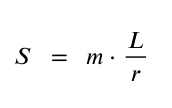

which can be rearranged as 

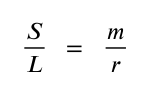

The expression shown above is the critical ingredient necessary for us to determine 𝑟 . Working with our quantum system, we will always know the values of S and 𝐿, which only leaves 𝑚 and 𝑟 as unknowns. But through the use of a technique known as Continued Fractions, we can approximate 𝑚 and 𝑟, which
will in turn complete our period finding problem.

# **Determining 𝑟 Through Continued Fractions**
***



We have finally reached the final step of our quantum period finding subroutine, which is the classical post-processing of the information gathered from a
measurement on system one. Since the value S comes from a measurement after the $QFT^†$ , both parts of our quantum system have now been collapsed
down to single states, which means that we have extracted all of the information we can. Thus, having completed all of the quantum steps, the only thing left
is to finish the algorithm classically. And as we already pointed out, we are left with the following equation of two known, and two unknown integers:

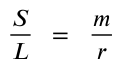

The key idea behind our final step uses a technique known as Continued Fractions, which is a classical algorithm for approximating a fraction as two integer
numbers:

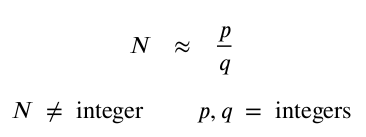

It is important to point out that this technique only works for non-integer numbers (if 𝑁 is an integer, then the obvious solution is 𝑝 = 𝑁 , 𝑞 = 1 ). For our
case, the number we want to approximate is 𝑆/𝐿, which is mathematically guaranteed to be non-integer so long as 𝑆 ≠ 0 . This is a subtle point, but it is
worth noting that our quantum period finding technique essentially 'breaks down' if the state measured on system one is the state of all |0⟩'s. Unfortunately,
the zero state is guaranteed to always be in the final superposition, which means that we must rely on a bit of good luck not to measure it.

Returning now to our Continued Fractions technique, the methodology for approximating the integers p and q involves finding values $a_𝑛$ , which form the
following repeating pattern:

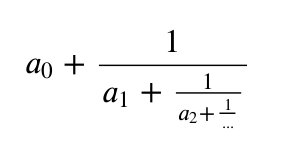

A bit complicated looking at first, but the basis for the algorithm is actually quite straightforward. At each step we separate the number $N_n$ into its integer and decimal components, store the integer as $a_n$, and use the reciprocal of remaining decimal $b_n$
as the next number in the algorithm:

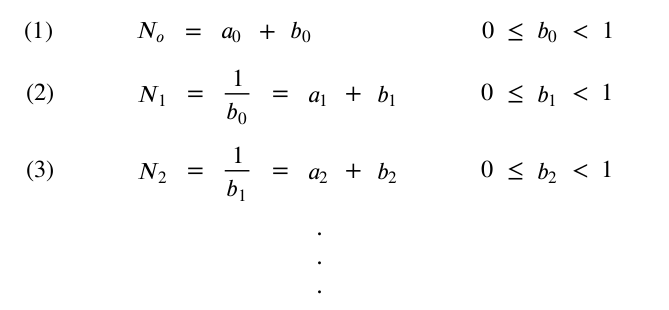

The algorithm recursively continues as shown above, terminating when either a $b_𝑛$ = 0 is found, or a sufficient level of accuracy is reached. Below is an
example of a full Continued Fractions process for which an exact approximation can be found:

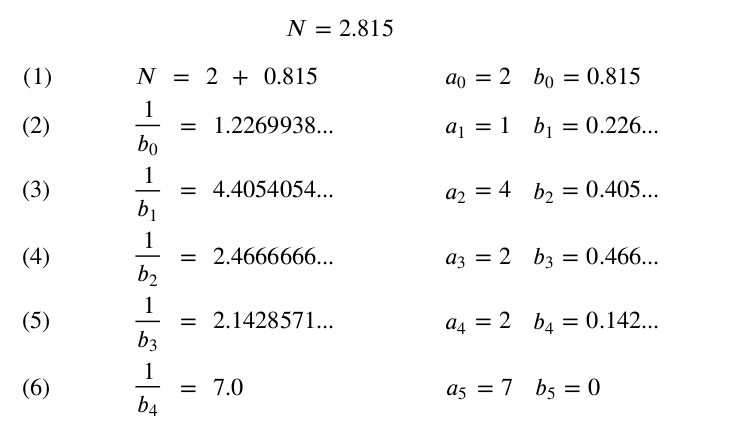

Putting all of the values of $a_n$ together, the final answer is as follows:

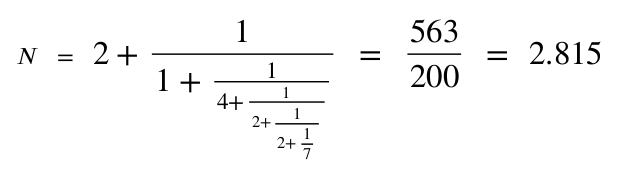

Alternatively, the process shown above can be terminated early for an approximate value, which will be useful for us later on. For example, if we had stopped
the algorithm after $a_3$, then our answer would be 31/11 = 2.8181..For this lesson, we will be implementing the Continued Fractions technique using the
function ConFrac:

In [22]:
def ConFrac(N, **kwargs):
  '''
  Input: N (float)
  Keyword Arguments: 
  a_max (integer) - the maximum number of iterations to continue approximating
  return_a (Bool) - if True, returns the array a containing the continued fraction information

  Evaluates the non-integer number N as the quantity p/q, where p and q are integers
  '''
  imax = 20
  r_a = False
  if 'a_max' in kwargs:
    imax = kwargs['a_max']
  if 'return_a' in kwargs:
    r_a = kwargs['return_a']
  a = []
  a.append( m.floor(N) )
  b = N - a[0]
  i = 1
  while( (round(b,10) != 0) and (i < imax) ):
    n = 1.0/b
    a.append( m.floor(n) )
    b = n - a[-1]
    i = i + 1
  #------------------------------
  a_copy = []
  for ia in np.arange(len(a)):
    a_copy.append(a[ia])
  for j in np.arange( len(a)-1 ):
    if( j == 0 ):
      p = a[-1] * a[-2] + 1
      q = a[-1]
      del a[-1]
      del a[-1]
    else:
      p_new = a[-1] * p + q
      q_new = p
      p = p_new
      q = q_new
      del a[-1]
  if(r_a == True):
    return q,p,a_copy
  else:
    return q,p

In [23]:
N = 2.815
#=====================================
q,p,a = ConFrac(N, return_a=True)
print('N = ',N,' = ',p,'/',q)
print('\na constants: ',a)
#-------------------------------------
accuracy = 4
q,p,a = ConFrac(N, a_max=accuracy, return_a=True)
print('\n--------------------------------------\nN = ',N,'  \u2248 ',p,'/',q)
print('\na constants: ',a)

N =  2.815  =  563 / 200

a constants:  [2, 1, 4, 2, 2, 7]

--------------------------------------
N =  2.815   ≈  31 / 11

a constants:  [2, 1, 4, 2]


Returning to our period finding problem, we now have the tool of Continued Fractions in our arsenal to complete our subroutine. We ended the previous
section noting that our quantum system provided us with the information S and L , which thanks to the $QFT^†$ operation, guarantees the following equation
holds:

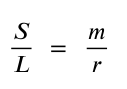

Because the combination of S/L is non-integer, we can now use Continued Fractions to approximate this value as the fraction m/r , which in turn means that
the denominator of our answer is the solution to our period finding problem! Using the ConFrac function, let's now see our complete period finding subroutine
in action:

In [24]:
a = 8
N = 15
Q = 4
print('a: ',a,'N: ',N)
#=====================================
q1 = QuantumRegister(Q,name='q1')
q2 = QuantumRegister(Q,name='q2')
an = QuantumRegister(Q-1,name='a')
c1 = ClassicalRegister(Q,name='c1')
c2 = ClassicalRegister(Q,name='c2')
qc = QuantumCircuit(q1,q2,an,c1,c2,name='qc')
#--------------------------------------
for i in np.arange(Q):
  qc.h(q1[int(i)])
Mod_Op(Q,qc,q1,q2,an,a,N)
print('\n_____ After Modulo Operation _____')
Wavefunction(qc,systems=[Q,Q,Q-1],show_systems=[True,True,False])

qc.measure(q2,c2)
QFT_dgr(qc,q1,Q)
qc.measure(q1,c1)
M = Measurement(qc,shots=1,print_M=False,return_M=True)
print('\nPartial Measurement:|'+list(M.keys())[0][5:9]+'>')
print('\nSystem One Measurement:|'+list(M.keys())[0][0:4]+'>')
#--------------------------------------
S = int(From_Binary(list(list(M.keys())[0][0:4]),'R'))
L = 2**Q
print('\nS = ',S,'L = ',L)
if( S != 0 ):
  r,mult = ConFrac(1.0*S/L)
  print('\nContinued Fractions Result:m = ',mult,'r = ',r)

a:  8 N:  15

_____ After Modulo Operation _____
0.25 |0000>|1000>     0.25 |0010>|1000>     0.25 |0001>|1000>     0.25 |0011>|1000>     0.25 |1100>|0100>     0.25 |1110>|0100>     0.25 |1101>|0100>     0.25 |1111>|0100>     0.25 |0100>|0010>     0.25 |0110>|0010>     0.25 |0101>|0010>     0.25 |0111>|0010>     0.25 |1000>|0001>     0.25 |1010>|0001>     0.25 |1001>|0001>     0.25 |1011>|0001>     

Partial Measurement:|1000>

System One Measurement:|0100>

S =  4 L =  16

Continued Fractions Result:m =  1 r =  4


As promised, the Continued Fractions technique allows us to extract the value of r with only a single measurement on system one. However, if you run the
cell of code above several times, you will find that there are still instances where our code fails to produce the correct r. More specifically, based on the four
possible measurement results for system one, our period finding subroutine produces the following answers:

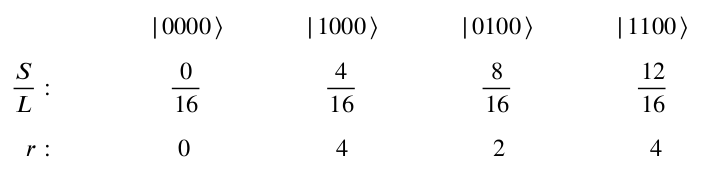

Thus, even though our final superposition state encodes the period r through evenly spaced basis states of distance L/r , it appears that only 50\% of the
possible final measurements will yield the correct 𝑟 . However, when interpreting the values of 𝑚 and 𝑟 obtained from Continued Fractions, we must also consider the possibility that our final fraction may have been reduced past the intended values. For example, in the results shown above, a measurement of
the state |0100⟩ leads to the Continued Fractions assessment of 8/16, yielding 𝑚 = 1 and 𝑟 = 2 . If we were to take this value of 𝑟 = 2 at face value, we
would find that it passes our requirements on 𝑟 , but ultimately fails to lead to the full factorization of 𝑁 :

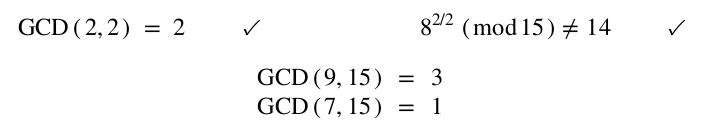

The fact that 𝑟 = 2 leads to one of the factors of 𝑁 here can be thought of as a lucky coincidence, simply due to the fact that 3 is a small factor which is easy
to stumble upon accidentally. More generally, if one uses an incorrect value of 𝑟 for a given 𝑎, the result will very likely lead to a failed GCD attempt. As we
can see above, here we have a case where our period finding subroutine has returned to us a value of 𝑟 which passes both requirements, and yet fails to
factor 𝑁 . Mathematically, our derivations from earlier proved that such a case shouldn't exist, which is a signal that one of two possibilities has occurred:

1. Our Continued Fractions technique over reduced the quantity 𝑚/𝑟
2. Our quantum system measured a state |𝑆⟩ which isn't a correct multiple of 𝐿/𝑟

Based on the final superposition state for our particular problem of 𝑁 = 15 , 𝑎 = 8, it should be clear that option (2) isn't a possibility, unless we introduce
measurement errors into the equation, which we are not. We will return to this second point in the next section, but for now let's focus on option (1) . If our
subroutine returns to us values for 𝑚 and 𝑟 which lead to a failed GCD factorization of 𝑁 , then our next move is to check whether any of the higher multiples
of 𝑚/𝑟 will lead to the correct period:

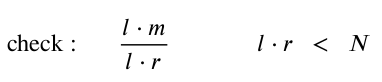

So long as the quantity 𝑙 ⋅ 𝑟 is less than 𝑁 , it is a viable candidate for the period of the modulo power function which we are trying to solve. Thus, if a
measurement of the state |0100⟩ in our subroutine returned to us the quantity 𝑚/𝑟 = 1/2, then the combinations 2/4 , 3/6 , 4/8 , etc... are all valid possible
solutions as well. After seeing that 𝑟 = 2 did not solve our problem, the next value to check would then be 𝑟 = 4 :

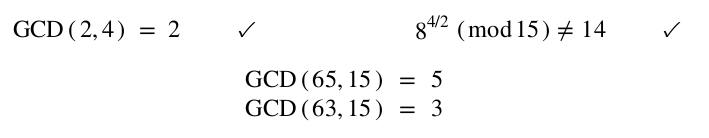

As anticipated, using the period 𝑟 = 4 solves our factorization problem, which confirms that our Continued Fractions implementation did indeed over simplify
the fraction 𝑚/𝑟 . To summarize then, knowing how to handle the possible interpretations of our Continued Fractions technique leads to a 75 % success rate of
our quantum subroutine for this problem (any measurement other than |0000⟩). So long as we don't get an unlucky measurement on system one, our
quantum period finding technique can successfully determine 𝑟 without any repeat measurements!

# **Finding 𝑟 with $2^𝑄$ States**
***

The example shown in the previous section demonstrates our first complete implementation of Shor's Algorithm. However, in taking the algorithm one step
further, in which we are ready to tackle the factorization of any number N , there is one final feature we must discuss. In the example of N = 15 and a = 8, the correct solution to the period finding subroutine turned out to be 𝑟 = 4 , which happens to be a factor of the quantity $2^𝑄$ , where 𝑄 is the number of qubits we
used in our circuit. If we return to the beginning of our discussion regarding DFT† on periodic functions, one subtle but very important point was the fact that
𝑓(𝑥) needed to have a precise structure. More specifically, here we are interested in the domain of 𝑓(𝑥), which needs to be over [ 0,𝐿 ] , where 𝐿 is some
integer multiple of the period 𝑟 . 

Now suppose that we remove the upper bound condition on 𝐿 , but still keep the inherent periodic structure of 𝑓(𝑥) the same, producing a value of 1 for 𝑥′
terms with a period of 𝑟 , offset by some $a_0$ , and 0 for all other 𝑥 values. Even though we are still dealing with the same underlying periodic function, having a
total length 𝐿 that is no longer an integer multiple of 𝑟 has dramatic consequences on the transformed function:

In [25]:
k = int( 2+4*random.random() )
r = int( 2+4*random.random() )
L = k*r + 1
print('k: ',k,'   r: ',r,'    L: ',L,'\n------------------------------\n')
#================================================
for q in np.arange(L):
  n = int(q)
  Q = 0
  for j in np.arange(k):
    Q = Q + np.exp( ((-2*m.pi*1.0j)/L) * n * j * r )
  print( 'n: ',n,'\u03A3 = ',round( Q.real,5 ),' + i',round(Q.imag,5) )

k:  3    r:  2     L:  7 
------------------------------

n:  0 Σ =  3.0  + i 0.0
n:  1 Σ =  -0.12349  + i -0.54104
n:  2 Σ =  0.72252  + i -0.34795
n:  3 Σ =  1.40097  + i 1.75676
n:  4 Σ =  1.40097  + i -1.75676
n:  5 Σ =  0.72252  + i 0.34795
n:  6 Σ =  -0.12349  + i 0.54104


Comparing the classical code shown above with the similar cell from earlier, we can see that extending the length of L by one causes the intermediate $x̃$ terms between L/r multiples to no longer sum to 0. Mathematically, the condition that L = k . r is a critical ingredient for all of the exponentials to sum to
zero in the $DFT^†$ summation. Without it, the contributing non-zero terms from f(x) no longer precess around the complex unit circle as evenly spaced points.
By changing L, the frequencies of these complex numbers are effectively altered, no longer leading to perfectly synchronized moments of constructive
interference.

Unfortunately, when it comes to constructing our quantum systems, 𝐿 is not something we can easily control. As we already know, the Hilbert space of our quantum system is determined by the number of qubits we use, 𝑄, resulting in 𝐿 = $2^Q$. To emphasize our dilemma then, consider a realistic case in which one would look to implement Shor's Algorithm, whereby the goal is to factor some number 𝑁 . Based on the 𝑎 we choose to use for our quantum modulo
operation, we have no way of knowing what period 𝑟 we are fundamentally encoding into the quantum system. We know that for the algorithm to work 𝑟 must be even, but unless 𝑟 is exactly some number 2𝑛 , we are guaranteed that 𝑟 won't divide into 𝐿 = $2^𝑄$ evenly. And if we consider problems where 𝑁 is
sufficiently large, the probability of picking an 𝑎 that will have a period of the form $2^𝑛$ gets increasingly smaller as 𝑁 grows larger. Thus, it's fair to say that
working with a quantum case where 𝐿 = 𝑘 ⋅ 𝑟 is more of the exception than the rule.

In anticipation that our quantum system is more likely to encounter periods which don't divide into $2^𝑄$ evenly, what then should we expect in terms of
diminishing algorithm accuracy? First off, because of the way in which our quantum modulo operation encodes the states of the system, we are guaranteed
that 𝐿 = $2^𝑄$ will only ever be at most 𝑟 − 1 states off from an optimal length. Secondly, states further away from |00...0⟩, closer to |11...1⟩ will feel the
impact of an imperfect 𝐿 the most. To see this, take a look at the cell of code below, which compares the effect of a $DFT^†$ operation on an 𝑓(𝑥) of length
𝐿 = 𝑘 ⋅ 𝑟 versus 𝐿 = 𝑘 ⋅ 𝑟 + 1:

k =  4     r =  5     a0 =  3


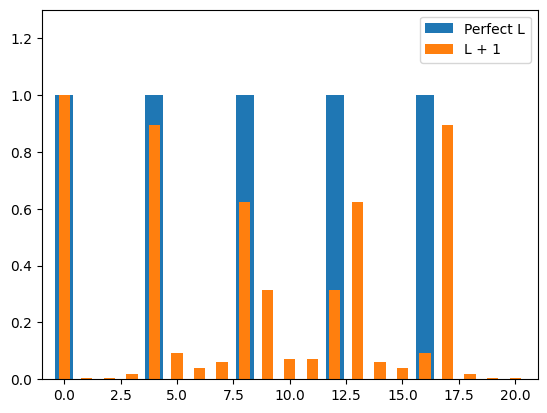

In [26]:
import matplotlib.pyplot as plt
k = int( 4 + 2*random.random() )
r = int( 3 + 5*random.random() )
a0 = int( (r-1)*random.random() )
print('k = ',k,'    r = ',r,'    a0 = ',a0)
#------------------------------------------
L = k*r
C = np.zeros(r)
C[a0] = 1
#------------------------------------------
f1 = []
f2 = []
for i in np.arange(k):
  for i2 in np.arange(r):
    f1.append( C[i2] )
    f2.append( C[i2] )
f2.append(0)

F1 = DFT(f1,inverse=True)
F2 = DFT(f2,inverse=True)

for q in np.arange( len(F1) ):
  F1[q] = round( abs(F1[q]/k)**2 ,4)
  F2[q] = round( abs(F2[q]/k)**2 ,4)
F2[-1] = round( abs(F2[-1]/k)**2 ,4)
#==========================================
x_bar = []
for j in np.arange(len(F1)):
  x_bar.append(int(j))
plt.bar(x_bar,F1)
x_bar.append(int(j+1))
plt.bar(x_bar,F2,width=0.5)
plt.legend(['Perfect L','L + 1'])
plt.axis([-1, len(F2), 0, 1.3])
plt.show()

In the plot above, note how the probabilities of the two f̃(x)'s differ as the states in the system get closer to 𝑆 = 𝐿 . Although it may not look it, both $DFT^†$ operations are actually correctly producing f̃(x) functions that are periodic in L/r. Consequently, the resulting amplitudes for this new period
cannot fall on exact integers, so their values are essentially distributed accordingly to the nearest available integer states (with some small overflow into
further states).

Returning now to our quantum period finding problem, the example above is meant to illustrate the kinds of superposition states we can expect from encoding
our modulo power function into a system of L = $2^Q$
states. The effect of the $QFT^†$ is still
creating a final superposition that is periodic in L/r
, it's just that L/r
is now no longer integer. Consequently, we must reevaluate how best to interpret the information obtained from the final measurement on system one,
and how we can use it to extract . In short, our Continued Fractions technique is still viable, but there are now some issues we must consider:

1. Our final measurement value, 𝑆 , now has a non-zero probability of falling on a state that is more than one integer value away from 𝐿/𝑟.
2. For ideal values of 𝑆 which are nearest integer values to 𝐿/𝑟, a Continued Fractions attempt of 𝑆/𝐿 may still fail to produce 𝑟.

To further differentiate the two problems outlined above, issue (1) is a worst-case type scenario in which our final measurement yields a state which is
nowhere near an 𝐿/𝑟 value. Consequently, the Continued Fractions assessment of 𝑆/𝐿 will almost certainly have no chance of yielding the correct 𝑟 .
Unfortunately, such instances are unavoidable due to the nature of superposition states, but are something we should come to expect when working with
quantum algorithms in general. Unless our algorithm is designed such that 100% of the probability in the system is distributed amongst desired states (and
our quantum computer is perfectly noiseless), an unlucky measurement is always a possibility, effectively negating all of the work of the algorithm. The
important thing is to always consider that a measurement result may be a dud, and to try and identify such instances as quickly as possible so that one can
start over.

Moving on to issue (2) , which is actually the best-case scenario, even if our measurement falls on a state which is a nearest neighbor integer to a multiple of L/r
, the Continued Fractions assessment of S/L may still fail to yield r directly. If we let the Continued Fractions technique continue to the full
approximation, we will always simply find the integers S and L, or their simplified fraction. And unless we get lucky and are searching for an r which evenly divides our L = $2^Q$
, then chances are the quantity S/L will not be an integer multiple of L/r. So then, in anticipation that the S/L we find is some value
slightly off from a true L/r multiple, we can attack the problem from two different angles:

1. Try lower order approximations to the Continued Fractions assessment of 𝑆/𝐿, and see if any of them yield 𝑟
2. Starting from the quantity 𝑆/𝐿, try using the Continued Fractions technique on nearest integer values of 𝑆 and 𝐿, within a reasonable threshold

# **Full Shor's Example**
***

Having now seen some techniques for evaluating the final measured state |S⟩ , we have reached the conclusion of our deep dive into Shor's Algorithm.
While well over half of this lesson was spent just on just understanding the role of modulo period finding, it is important to remember the full context of the
algorithm: factoring. Incorporating all of the topics we've covered thus far, below is a full code implementation of Shor's Algorithm for the case of N = 55.I
encourage you to run the cell several times and see the various kinds of results one can get from the combinations of a and S:

In [27]:
def Primality(N):
  '''
  Input: N (integer)
  Returns True is N is a prime number, otherwise False
  '''
  is_prime = True
  if( (N==1) or (N==2) or (N==3) ):
    is_prime = True
  elif( (N%2==0) or (N%3==0) ):
    is_prime = False
  elif( is_prime==True ):
    p = 5
    while( (p**2 <= N) and (is_prime==True) ):
      if( (N%p==0) or (N%(p+2)==0) ):
        is_prime = False
      p = p + 6
  return is_prime

In [28]:
def Mod_r_Check(a, N, r):
  '''
  Input: a (integer), N (integer), r (integer)
  Checks a value of r, returning True or False based on whether it correctly leads to a factor of N
  '''
  v1 = a**(int(2)) % N
  v2 = a**(int(2+r)) % N
  if( (v1 == v2) and (r<N) and (r!=0) ):
    return True
  else:
    return False

In [29]:
def Evaluate_S(S, L, a, N):
  '''
  Input:
  S (integer), L (integer), a (integer), N (integer)
  Attempts to use the measured state |S> to find the period r
  '''
  Pairs = [[S,L]]
  for s in np.arange(3):
    S_new = int( S - 1 + s)
    for l in np.arange(3):
      L_new = int( L - 1 + l)
      if( ((S_new!=S) or (L_new!=L)) and (S_new!=L_new) ):
        Pairs.append( [S_new,L_new] )
  #---------------------------  Try 9 combinations of S and L, plus or minus 1 from S & L
  period = 0
  r_attempts = []
  found_r = False
  while( (found_r==False) and (len(Pairs)!=0) ):
    order = 1
    S_o = Pairs[0][0]
    L_o = Pairs[0][1]
    q_old = -1
    q = 999
    while( q_old != q ):
      q_old = int( q )
      q,p = ConFrac(S_o/L_o,a_max=(order+1))
      new_r = True
      for i in np.arange(len(r_attempts)):
        if( q == r_attempts[i] ):
          new_r = False
      if(new_r):
        r_attempts.append( int(q) )
        r_bool = Mod_r_Check(a,N,q)
        if( r_bool ):
          found_r = True
          q_old = q
          period = int(q)
      order = order + 1
    del Pairs[0]
  #--------------------------- Try higher multiples of already attempted r values
  r_o = 0
  while( (found_r == False) and (r_o < len(r_attempts)) ):
    k = 2
    r2 = r_attempts[r_o]
    while( k*r2 < N ):
      r_try = int(k*r2)
      new_r = True
      for i2 in np.arange(len(r_attempts)):
        if( r_try == r_attempts[i2] ):
          new_r = False
      if(new_r):
        r_attempts.append( int(r_try) )
        r_bool = Mod_r_Check(a,N,r_try)
        if( r_bool ):
          found_r = True
          k = N
          period = int(r_try)
      k = k + 1
    r_o = r_o + 1
  #--------------------------- If a period is found, try factors of r for smaller periods
  if( found_r == True ):
    Primes = []
    for i in np.arange(2,period):
      if( Primality(int(i)) ):
        Primes.append(int(i))
    if( len(Primes) > 0 ):
      try_smaller = True
      while( try_smaller==True ):
        found_smaller = False
        p2 = 0
        while( (found_smaller==False) and (p2 < len(Primes)) ):
          #print('p2: ',p2)
          #print( 'period: ',period,'  ',Primes[p2] )
          try_smaller = False
          if( period/Primes[p2] == m.floor( period/Primes[p2] ) ):
            r_bool_2 = Mod_r_Check(a,N,int(period/Primes[p2]))
            if( r_bool_2 ):
              period = int(period/Primes[p2])
              found_smaller = True
              try_smaller = True
          p2 = p2 + 1
  return period

In [30]:
N = 55
Q = m.ceil( m.log(N,2) )
L = 2**Q
a = int( 2+ (N-3)*random.random() )
r = r_Finder(a,N)
#=================================================
print('N = ',N,'Q = ',Q,'a = ',a,'Searching For: r =',r)
if( Euclids_Alg(a,N) > 1 ):
  print('\na happens to have a factor in common with N: ',Euclids_Alg(a,N))
else:
  q1 = QuantumRegister(Q,name='q1')
  q2 = QuantumRegister(Q,name='q2')
  an = QuantumRegister(Q-1,name='a')
  c1 = ClassicalRegister(Q,name='c1')
  c2 = ClassicalRegister(Q,name='c2')
  qc = QuantumCircuit(q1,q2,an,c1,c2,name='qc')
  #----------------------------------------------
  for i in np.arange(Q):
    qc.h(q1[int(i)])
  Mod_Op(Q,qc,q1,q2,an,a,N)
  qc.measure(q2,c2)
  QFT_dgr(qc,q1,Q)
  qc.measure(q1,c1)
  M = Measurement(qc,shots=1,print_M=False,return_M=True)
  S = int(From_Binary(list(list(M.keys())[0][0:Q]),'R'))
  #----------------------------------------------
  print('\nSystem One Measurement:|'+list(M.keys())[0][0:Q]+'>')
  print('\nS = ',S,'L = ',L)
  if( S!= 0):
    r = Evaluate_S(S,L,a,N)
    if( r!=0 ):
      print('\nFound the period r = ',r)
      if( ((r)%2 == 0) and ( a**(int(r/2))%N != int(N-1) )):
        f1 = Euclids_Alg(int(a**(int(r/2))+1),N)
        f2 = Euclids_Alg(int(a**(int(r/2))-1),N)
        print('\nFactors of N: ',int(f1),' ',int(f2))
      else:
        if( (r)%2 != 0 ):
          print('\nr does not meet criteria for factoring N: r is not even')
        else:
          print('\nr does not meet criteria for factoring N: a^(r/2) (mod N) = N-1')
    else:
      print('\nCould not find the period using S, start over')
  else:
    print('\nMeasured S = 0, start over')

N =  55 Q =  6 a =  29 Searching For: r = 10

System One Measurement:|100000>

S =  32 L =  64

Found the period r =  10

r does not meet criteria for factoring N: a^(r/2) (mod N) = N-1


This concludes this lab session, and our analysis of the famous Shor's Factoring Algorithm. Since it was first published 1995, Shor's Algorithm still remains one of
the most important and influential quantum algorithms to date. As evidenced by the sheer number of mathematical tricks involved, Peter Shor's recognition of
how to turn a factoring problem into a period finding problem makes this quantum algorithm an inspiration for the potential of quantum computing.

## **References**
***

1. P. W. Shor, "Polynomial-Time Algorithms for Prime Factorization and Discrete Logarithms on a Quantum Computer", SIAM JSC. (1997)
2. [S. Beauregard, "Circuit for Shor's algorithm using 2n+3 qubits", Quantum Information and Computation. (2003)](https://arxiv.org/abs/quant-ph/0205095)
3. [Qiskit Notebook](https://learn.qiskit.org/course/ch-algorithms/shors-algorithm)